## Selecting feature for 2 times
### Author: Xu Haozhou
    - Due to the difference on random seed, you may need to try different random seed to get the best answer
    - The settings for the parameters in this file may not be the most suitable, you still need to do some adjustment.

In [1172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import sklearn
import scipy as sp
import statsmodels as sm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import torch as t
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
import torchvision as tv
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.utils as vutils
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss

## Preparation

In [1173]:
# Data are sorted in ./SuperData
Train_DataX = pd.read_csv("./SuperData/X_train.csv", index_col=[0], header=[0, 1, 2])
Valid_DataX = pd.read_csv("./SuperData/X_valid.csv", index_col=[0], header=[0, 1, 2])
Test_DataX = pd.read_csv('./SuperData/X_test.csv', header=[0,1,2], index_col=0)
Train_DataY = pd.read_csv("./task2/Y_train.csv", index_col=[0], header=[0])
Valid_DataY = pd.read_csv("./task2/Y_valid.csv", index_col=[0], header=[0])

In [1174]:
# Get used columns
column_names = Train_DataX.columns
X_Train = Train_DataX[column_names]
X_valid = Valid_DataX[column_names]
X_Test = Test_DataX[column_names]

# Fill the missing values
Train_DataX.fillna(0, inplace=True)
Valid_DataX.fillna(0, inplace=True)
Test_DataX.fillna(0, inplace=True)


In [1175]:
# Show size of Train_DataX
X_Train.shape

(16760, 7904)

In [1176]:
# Change each to numpy array
X_train = X_Train.to_numpy()
X_valid = Valid_DataX.to_numpy()
X_test = X_Test.to_numpy()
Y_train = Train_DataY.to_numpy()
Y_valid = Valid_DataY.to_numpy()

In [1177]:
X_train.shape

(16760, 7904)

In [1178]:
Y_train = Y_train.ravel()
Y_valid = Y_valid.ravel()

## Step1

In [1179]:
# Train X_train and Y_train by Ensemble model on the skewed data
from sklearn.ensemble import VotingClassifier
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# XGBoost
import xgboost as xgb

In [1180]:
model = xgb.XGBRegressor(booster='gbtree', eval_metric='rmse', n_estimators=100,
                            max_depth=6, min_child_weight=3,
                            learning_rate=0.04, subsample=0.6, colsample_bytree=1, random_state=3340, n_jobs=6)
model.fit(X_train, Y_train)

# Valid by X_valid and Y_valid
Y_valid_pred = model.predict(X_valid)
# Get rmse
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_valid, Y_valid_pred))
print("RMSE: %f" % (rmse))

RMSE: 1.735046


In [1181]:
importance = model.feature_importances_
# Construct a dataframe to show the importance of each feature
importance_df = pd.DataFrame(columns=column_names, data=[importance])

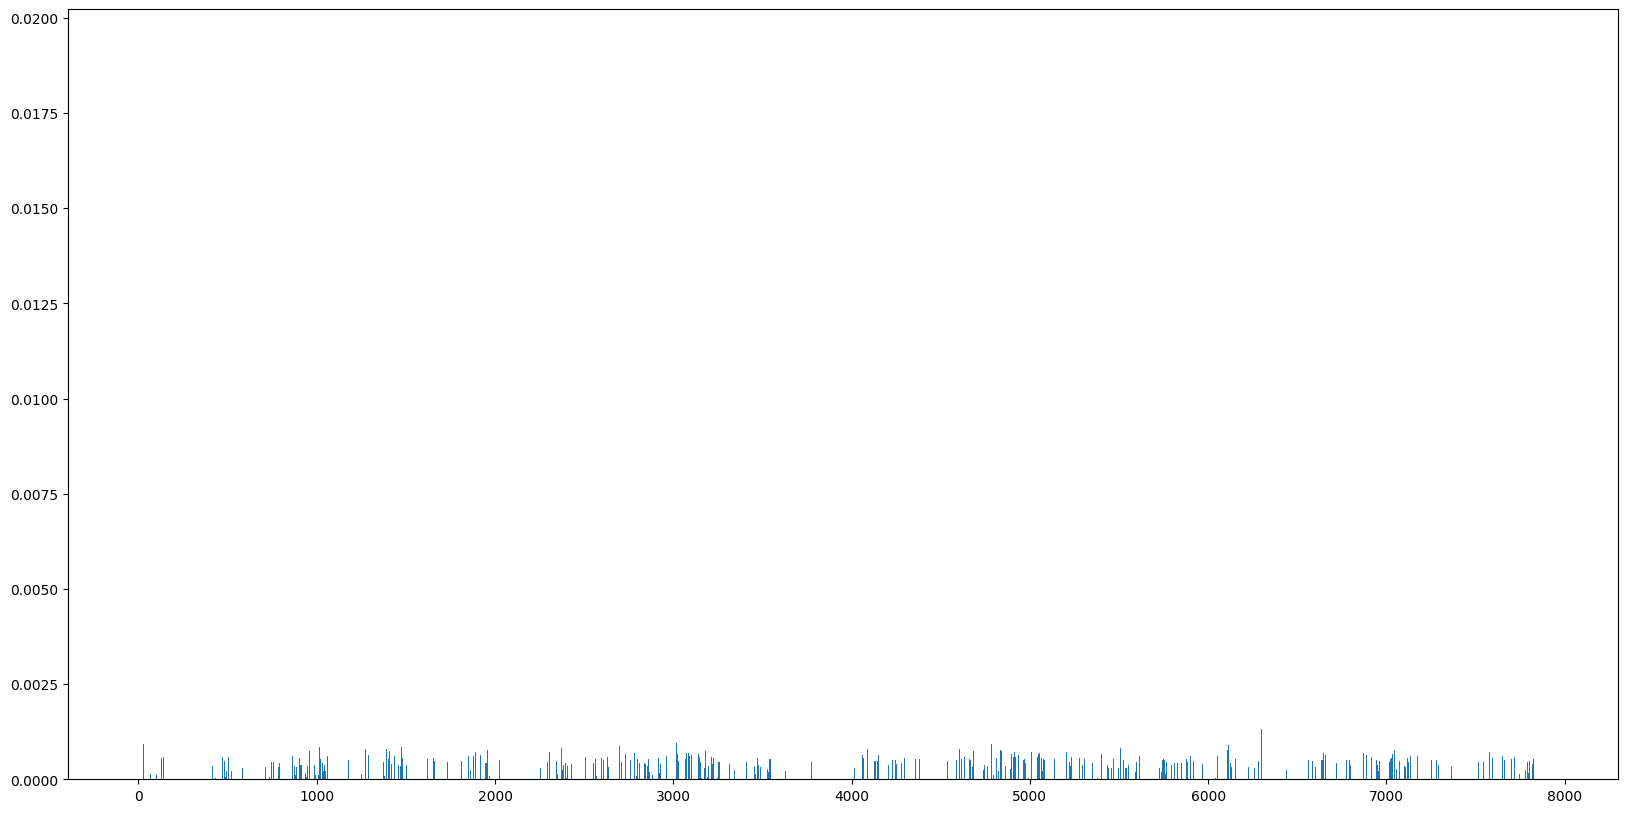

In [1182]:
# Importance graph
x_axis = range(len(importance))
plt.figure(figsize=(20, 10))
plt.bar(x_axis, importance_df.iloc[0])
plt.show()

In [1183]:
truetable_data1 = importance_df.values > np.mean(importance_df.values)
getcolumn = importance_df.columns[truetable_data1[0]]
importance_df.loc[:, getcolumn].to_csv("./T2feature/1-3-1_mean.csv", header=True)
getcolumn.shape

(1947,)

In [1184]:
importance_df.loc[:, getcolumn]

LEVEL2               alanine aminotransferase                                \
Aggregation Function                     mean                                 
hours_in                                    0         3         8        21   
0                                    0.000175  0.000916  0.000475  0.000324   

LEVEL2                                                                 \
Aggregation Function                              time_since_measured   
hours_in                   22       avg      diff                   0   
0                     0.00053  0.000222  0.000229            0.000137   

LEVEL2                                    ... white blood cell count  \
Aggregation Function                      ...    time_since_measured   
hours_in                     3        14  ...                     22   
0                     0.000152  0.000201  ...               0.000533   

LEVEL2                         white blood cell count urine            \
Aggregation Function                                   mean             
hours_in                    23                            8        10   
0                     0.000606                     0.000566  0.000475   

LEVEL2                                                                  \
Aggregation Function           time_since_measured                       
hours_in                   avg                   1         3         8   
0                     0.000483            0.000721  0.000568  0.000264   

LEVEL2                                    
Aggregation Function                      
hours_in                    12        23  
0                     0.000371  0.001085  

[1 rows x 1947 columns]

## Step 2

In [1185]:
X_train = Train_DataX[getcolumn]
X_valid = Valid_DataX[getcolumn]
X_test2 = Test_DataX[getcolumn]

# Change each to numpy array
X_train = X_train.to_numpy()
X_valid = X_valid.to_numpy()
X_test2 = X_test2.to_numpy()
Y_train = Train_DataY.to_numpy().ravel()
Y_valid = Valid_DataY.to_numpy().ravel()

In [1186]:
X_train.shape

(16760, 1947)

In [1187]:
model2 = xgb.XGBRegressor(booster='gbtree', eval_metric='rmse', n_estimators=300,
                            max_depth=6, min_child_weight=3,
                            learning_rate=0.04, subsample=0.6, colsample_bytree=1, random_state=3340, n_jobs=6)
model2.fit(X_train, Y_train)

# Valid by X_valid and Y_valid
Y_valid_pred = model2.predict(X_valid)
# Get rmse
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_valid, Y_valid_pred))
print("RMSE: %f" % (rmse))

RMSE: 1.724062


In [1188]:
importance = model2.feature_importances_
# Construct a dataframe to show the importance of each feature
importance_df = pd.DataFrame(columns=getcolumn, data=[importance])

In [1189]:
truetable_data1 = importance_df.values > np.mean(importance_df.values)
getcolumn = importance_df.columns[truetable_data1[0]]
importance_df.loc[:, getcolumn].to_csv("./T2feature/1-3-2_mean.csv", header=True)
getcolumn.shape

(802,)

In [1190]:
importance_df.loc[:, getcolumn]

LEVEL2               alanine aminotransferase   albumin                      \
Aggregation Function                     mean      mean                       
hours_in                                   22         2         4         8   
0                                    0.000609  0.001346  0.000659  0.000656   

LEVEL2                                                                 \
Aggregation Function                    time_since_measured             
hours_in                    21      avg                   7        21   
0                     0.000612  0.00095            0.000546  0.000594   

LEVEL2                   albumin pleural alkaline phosphate  ...  \
Aggregation Function time_since_measured               mean  ...   
hours_in                              15                  2  ...   
0                               0.000701            0.00063  ...   

LEVEL2               white blood cell count                                \
Aggregation Function    time_since_measured                                 
hours_in                                 13        16        17        18   
0                                  0.000628  0.000645  0.001704  0.000668   

LEVEL2                                   white blood cell count urine  \
Aggregation Function                                             mean   
hours_in                    19        23                            8   
0                     0.000919  0.000544                     0.000679   

LEVEL2                                                       
Aggregation Function time_since_measured                     
hours_in                               3        12       23  
0                               0.000517  0.000571  0.00078  

[1 rows x 802 columns]

## Step 3

In [1191]:
X_train = Train_DataX[getcolumn]
X_valid = Valid_DataX[getcolumn]
X_test3 = Test_DataX[getcolumn]

# Change each to numpy array
X_train = X_train.to_numpy()
X_valid = X_valid.to_numpy()
X_test3 = X_test3.to_numpy()
Y_train = Train_DataY.to_numpy().ravel()
Y_valid = Valid_DataY.to_numpy().ravel()

In [1192]:
X_train.shape

(16760, 802)

In [1193]:
model3 = xgb.XGBRegressor(booster='gbtree', eval_metric='rmse', n_estimators=300,
                            max_depth=6, min_child_weight=3,
                            learning_rate=0.04, subsample=0.6, colsample_bytree=1, random_state=3340, n_jobs=6)
model3.fit(X_train, Y_train)

# Valid by X_valid and Y_valid
Y_valid_pred = model3.predict(X_valid)
# Get rmse
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_valid, Y_valid_pred))
print("RMSE: %f" % (rmse))

RMSE: 1.725952


In [1194]:
importance = model3.feature_importances_
# Construct a dataframe to show the importance of each feature
importance_df = pd.DataFrame(columns=getcolumn, data=[importance])

In [1195]:
truetable_data1 = importance_df.values > np.mean(importance_df.values)
getcolumn = importance_df.columns[truetable_data1[0]]
importance_df.loc[:, getcolumn].to_csv("./T2feature/1-3-3_mean.csv", header=True)
getcolumn.shape

(267,)

In [1196]:
importance_df.loc[:, getcolumn]

LEVEL2                 albumin           anion gap asparate aminotransferase  \
Aggregation Function      mean                mean                      mean   
hours_in                     8       avg        23                        10   
0                     0.001273  0.001929  0.001324                   0.00182   

LEVEL2                                   blood urea nitrogen           \
Aggregation Function                                    mean            
hours_in                    12        22                  16       23   
0                     0.001502  0.001328            0.001492  0.00347   

LEVEL2               calcium ionized cardiac index  ... troponin-t  \
Aggregation Function            mask          mask  ...       mask   
hours_in                          23             7  ...         20   
0                           0.001298      0.001712  ...   0.001315   

LEVEL2                                                weight  \
Aggregation Function time_since_measured                mean   
hours_in                               0        21        17   
0                               0.001331  0.001289  0.001352   

LEVEL2               white blood cell count                                \
Aggregation Function    time_since_measured                                 
hours_in                                 12        13        17        18   
0                                   0.00159  0.001899  0.001768  0.001381   

LEVEL2                         white blood cell count urine  
Aggregation Function                    time_since_measured  
hours_in                    23                           23  
0                     0.001559                     0.001336  

[1 rows x 267 columns]

## Result

In [1197]:
Y_valid_pred

array([3.7262301, 4.6828394, 3.3348858, ..., 5.021346 , 3.177342 ,
       2.6947322], dtype=float32)

In [1198]:
Y_valid

array([1.67847222, 5.90171296, 3.54657407, ..., 9.14388889, 6.12417824,
       3.81853009])

In [1199]:
# if auc < 1.73, output the result by X_test
if rmse < 1.75:
    Y_test_prob = model3.predict(X_test3)
    index = X_Test.index
    output = pd.DataFrame(Y_test_prob, columns=['Predicted'], index=index, dtype=float)
    print(output.head())
    output.to_csv('output.csv', index_label='Id')

                  Predicted
32_175413_295037   3.716649
33_176176_296681   2.536534
42_119203_210828   2.602695
44_181750_291554   2.316936
61_176332_252348   2.443878
